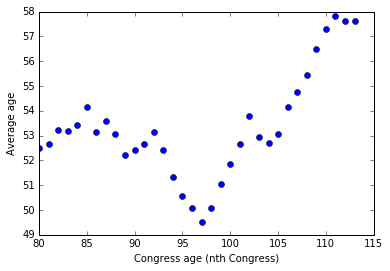

In [28]:
#####################
# CS 181, Spring 2016
# Homework 1, Problem 3
#
##################

import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

csv_filename = 'congress-ages.csv'
times  = []
ages = []

with open(csv_filename, 'r') as csv_fh:

    # Parse as a CSV file.
    reader = csv.reader(csv_fh)

    # Skip the header line.
    next(reader, None)

    # Loop over the file.
    for row in reader:

        # Store the data.
        times.append(float(row[0]))
        ages.append(float(row[1]))

# Turn the data into numpy arrays.
times  = np.array(times)
ages = np.array(ages)

# Plot the data.
plt.plot(times, ages, 'o')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
plt.show()

# Create the simplest basis, with just the time and an offset.
X = np.vstack((np.ones(times.shape), times)).T

# Define the given basis functions (a) through (e)
phi_a = [times**i for i in range(0,7)]
phi_b = [times**i for i in range(0,4)]
phi_c = [np.sin(times/i) for i in range(1,7)]
phi_d = [np.sin(times/i) for i in range(1,11)]
phi_e = [np.sin(times/i) for i in range(1,23)]

# Define other bases, using the basis functions (a) through (e).
# Note that for (a) and (b) the definition of the function also defines the basis, since x**0 = 1
# We add a column of ones for (c) through (e).

X_a = np.vstack(phi_a).T
X_b = np.vstack(phi_b).T
X_c = np.vstack((np.ones(times.shape), phi_c)).T
X_d = np.vstack((np.ones(times.shape), phi_d)).T
X_e = np.vstack((np.ones(times.shape), phi_e)).T

# Nothing fancy for outputs.
Y = ages

# Find the regression weights using the Moore-Penrose pseudoinverse.
w = np.linalg.solve(np.dot(X.T, X) , np.dot(X.T, Y))
w_a = np.linalg.solve(np.dot(X_a.T, X_a) , np.dot(X_a.T, Y))
w_b = np.linalg.solve(np.dot(X_b.T, X_b) , np.dot(X_b.T, Y))
w_c = np.linalg.solve(np.dot(X_c.T, X_c) , np.dot(X_c.T, Y))
w_d = np.linalg.solve(np.dot(X_d.T, X_d) , np.dot(X_d.T, Y))
w_e = np.linalg.solve(np.dot(X_e.T, X_e) , np.dot(X_e.T, Y))

# Compute the regression line on a grid of inputs.
# DO NOT CHANGE grid_times!!!!!
grid_times = np.linspace(75, 120, 200)
grid_X = np.vstack((np.ones(grid_times.shape), grid_times))
# The input grids are generated according to the basis functions.
grid_a = np.vstack([grid_times**i for i in range(0,7)])
grid_b = np.vstack([grid_times**i for i in range(0,4)])
grid_c = np.vstack((np.ones(grid_times.shape), [np.sin(grid_times/i) for i in range(1,7)]))
grid_d = np.vstack((np.ones(grid_times.shape), [np.sin(grid_times/i) for i in range(1,11)]))
grid_e = np.vstack((np.ones(grid_times.shape), [np.sin(grid_times/i) for i in range(1,23)]))

# We now do the 'prediction' step on our input grids.
grid_Yhat  = np.dot(grid_X.T, w)
grid_Yhat_a = np.dot(grid_a.T, w_a)
grid_Yhat_b = np.dot(grid_b.T, w_b)
grid_Yhat_c = np.dot(grid_c.T, w_c)
grid_Yhat_d = np.dot(grid_d.T, w_d)
grid_Yhat_e = np.dot(grid_e.T, w_e)



# Plot the data and the regression line. 
# Labels are added, as well as bounds for values along the x- and y-axis.
# Bounds are needed for bases with higher-order terms, which cause extreme values of y_hat past the bounds of our dataset.

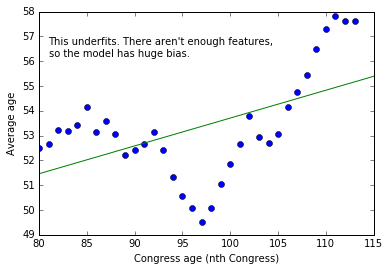

In [29]:
# Linear fit.
fig = plt.figure(1)
plt.plot(times, ages, 'o', grid_times, grid_Yhat, '-')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
axes = plt.gca()
axes.set_xlim([80,115])
axes.set_ylim([49,58])
plt.text(81,57, "This underfits. There aren't enough features,\nso the model has huge bias.",horizontalalignment='left',
        verticalalignment='top')

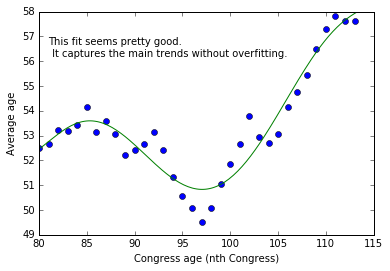

In [16]:
# With basis given in (a)
fig_a = plt.figure(2)
plt.plot(times, ages, 'o', grid_times, grid_Yhat_a, '-')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
axes = plt.gca()
axes.set_xlim([80,115])
axes.set_ylim([49,58])
plt.text(81,57, "This fit seems pretty good. \n It captures the main trends without overfitting.",horizontalalignment='left',
        verticalalignment='top')

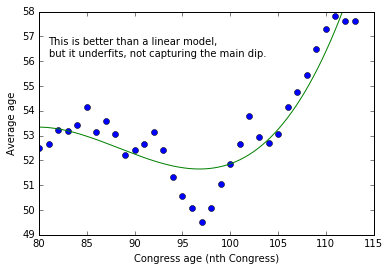

In [19]:
# With basis given in (b)
fig_b = plt.figure(3)
plt.plot(times, ages, 'o', grid_times, grid_Yhat_b, '-')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
axes = plt.gca()
axes.set_xlim([80,115])
axes.set_ylim([49,58])
plt.text(81,57, "This is better than a linear model, \nbut it underfits, not capturing the main dip.",horizontalalignment='left',
        verticalalignment='top')

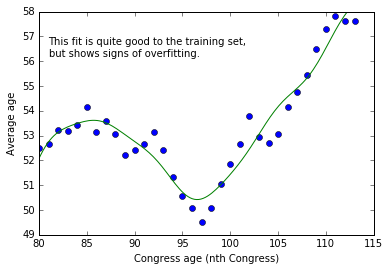

In [20]:
# With basis given in (c)
fig_c = plt.figure(4)
plt.plot(times, ages, 'o', grid_times, grid_Yhat_c, '-')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
axes = plt.gca()
axes.set_xlim([80,115])
axes.set_ylim([49,58])
plt.text(81,57, "This fit is quite good to the training set, \nbut shows signs of overfitting. ",horizontalalignment='left',
        verticalalignment='top')

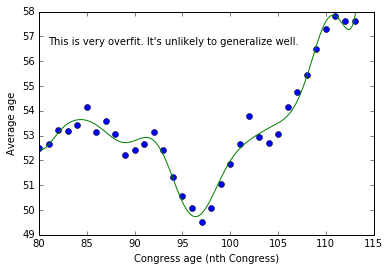

In [21]:
# With basis given in (d)
fig_d = plt.figure(5)
plt.plot(times, ages, 'o', grid_times, grid_Yhat_d, '-')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
axes = plt.gca()
axes.set_xlim([80,115])
axes.set_ylim([49,58])
plt.text(81,57, "This is very overfit. It's unlikely to generalize well.",horizontalalignment='left',
        verticalalignment='top')

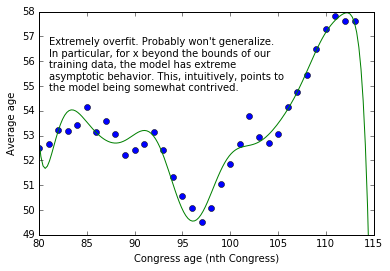

In [26]:
# With basis given in (e)
fig_e = plt.figure(6)
plt.plot(times, ages, 'o', grid_times, grid_Yhat_e, '-')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
axes = plt.gca()
axes.set_xlim([80,115])
axes.set_ylim([49,58])
plt.text(81,57, "Extremely overfit. Probably won't generalize. \nIn particular, for x beyond the bounds of our \ntraining data, the model has extreme \nasymptotic behavior. This, intuitively, points to \nthe model being somewhat contrived.",horizontalalignment='left',
        verticalalignment='top')

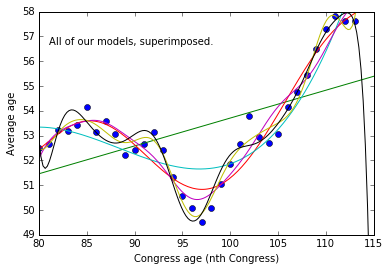

In [27]:
# All fits superimposed
fig_all = plt.figure(7)
plt.plot(times, ages, 'o', grid_times, grid_Yhat, '-')
plt.plot(grid_times, grid_Yhat_a, '-')
plt.plot(grid_times, grid_Yhat_b, '-')
plt.plot(grid_times, grid_Yhat_c, '-')
plt.plot(grid_times, grid_Yhat_d, '-')
plt.plot(grid_times, grid_Yhat_e, '-')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
axes = plt.gca()
axes.set_xlim([80,115])
axes.set_ylim([49,58])
plt.text(81,57, "All of our models, superimposed.",horizontalalignment='left',
        verticalalignment='top')

plt.show()